<a href="https://colab.research.google.com/github/alibagheribardi/Regression/blob/main/RegressionV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics.pairwise import euclidean_distances
import networkx as nx
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,"$452,600.0",NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,"$358,500.0",NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,"$352,100.0",NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,"$341,300.0",NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,"$342,200.0",NEAR BAY


In [7]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  object 
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.7+ MB


In [9]:
features = data.columns
# ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
#       'total_bedrooms', 'population', 'households', 'median_income',
#      'median_house_value', 'ocean_proximity']

In [54]:
# Assuming 'data' is your DataFrame and target contains values like '$452,600.'
train = data.drop(columns=['median_house_value'])
target = data['median_house_value']

# Print the shapes
print(train.shape, target.shape)

# Clean and convert 'target' values, only apply string operations if the value is a string
target_cleaned = target.apply(lambda x: float(str(x).replace('$', '').replace(',', '').strip()) if isinstance(x, str) else x)

# If you want to update the target column in the original DataFrame
data['median_house_value'] = target_cleaned

# Print cleaned target values
print(target_cleaned.head())
print(np.min(target_cleaned), np.max(target_cleaned))
print(' max-min:', np.max(target_cleaned)-np.min(target_cleaned) )


(20433, 9) (20433,)
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64
14999.0 500001.0
 max-min: 485002.0


In [19]:
mapping = {
    '<1H OCEAN': 1,
    'INLAND': 2,
    'ISLAND': 3,
    'NEAR BAY': 4,
    'NEAR OCEAN': 5
}

train['ocean_proximity_mapped'] = train['ocean_proximity'].map(mapping)
modified_ocean_proximity = train['ocean_proximity_mapped'].to_numpy()



In [74]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

def partition_array(A, max_clusters=300, method='ward', distance_threshold=None):
    A = np.array(A)
    Z = linkage(A.reshape(-1, 1), method=method)

    # Determine clusters based on either a fixed max_clusters or a distance threshold
    if distance_threshold is not None:
        labels = fcluster(Z, t=distance_threshold, criterion='distance')
    else:
        labels = fcluster(Z, t=max_clusters, criterion='maxclust')

    k = len(set(labels))  # Actual number of clusters found
    index_clust_A = [np.where(labels == i+1)[0] for i in range(k)]
    clust_A = [A[indices] for indices in index_clust_A]

    # Ensure bin edges are sorted and unique
    bin_edges = sorted(set(np.concatenate([A[indices] for indices in index_clust_A])))

    # Extend the last bin edge to ensure full coverage
    bin_edges.append(bin_edges[-1] + (bin_edges[-1] - bin_edges[-2]))

    return index_clust_A, clust_A, bin_edges

index_clust_A, clust_A, bin_edges = partition_array(target_cleaned)


[   0    1    2 ... 3831 3832 3833]


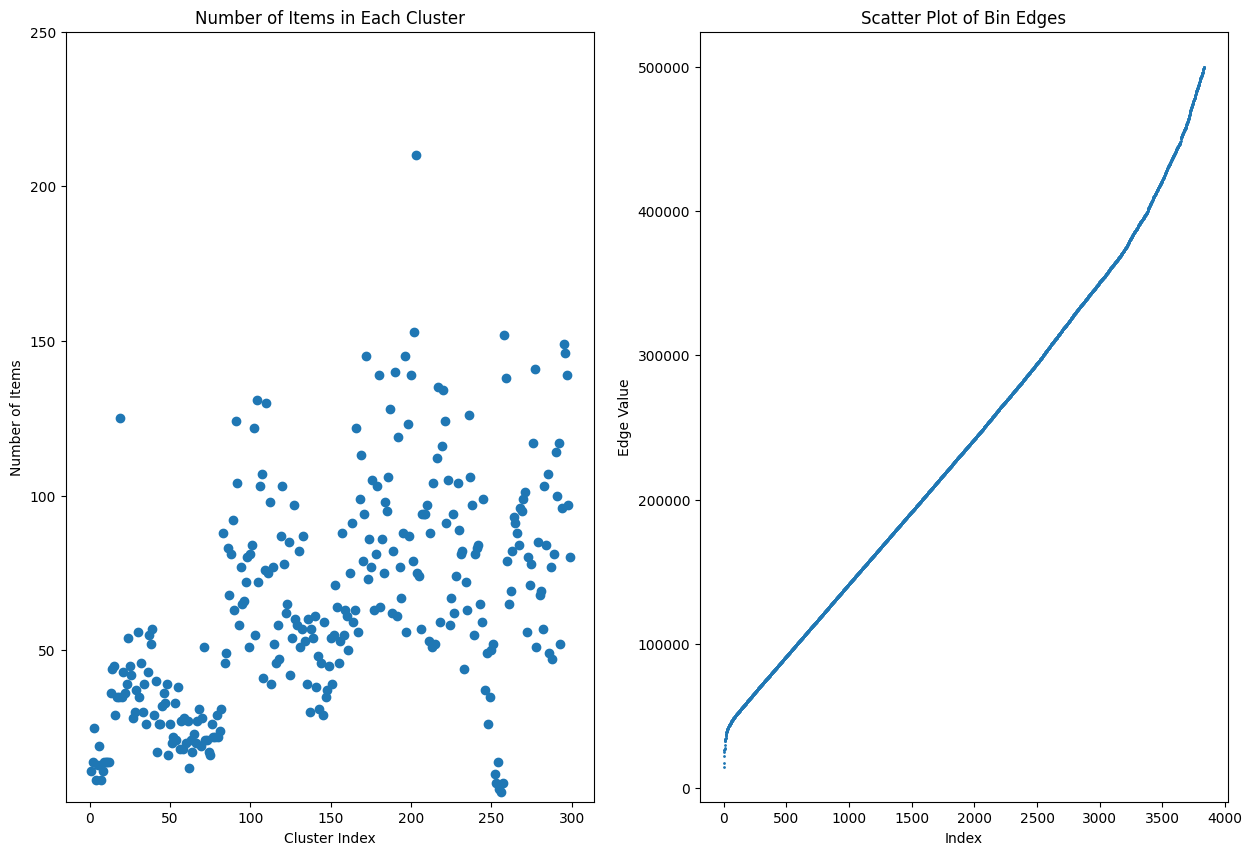

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'bin_edges' and 'index_clust_A' are already defined
edges = np.sort(bin_edges)
num = np.arange(len(bin_edges))
print(num)

# Get the number of items in each cluster
num_index = [len(item) for item in index_clust_A]

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

# First scatter plot: number of items per cluster vs. cluster index
ax[0].scatter(np.arange(len(index_clust_A)), num_index)
ax[0].set_title("Number of Items in Each Cluster")
ax[0].set_xlabel("Cluster Index")
ax[0].set_ylabel("Number of Items")
ax[0].set_ylim(1, 250)

# Second scatter plot: bin edges vs. indices
ax[1].scatter(num, edges, s=1)
ax[1].set_title("Scatter Plot of Bin Edges")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Edge Value")

# Show the plot
plt.show()


In [ ]:
# Compute the Euclidean distance matrix for the selected features
distances = euclidean_distances(df)  # Exclude the 'Target' column

# Initialize the adjacency matrix
adjacency_matrix = np.zeros((len(df_selected), len(df_selected)), dtype=int)

# For each sample, perform the steps
for i in range(len(df_selected)):
    # Distances of sample i to all other samples
    sample_distances = distances[i]

    # Sort samples from farthest to closest (excluding itself)
    sorted_indices = np.argsort(sample_distances)[::-1]  # From farthest to closest
    sorted_indices = sorted_indices[sorted_indices != i]  # Exclude the sample itself

    # Move from farthest to closest
    for j in range(len(sorted_indices)):
        # Samples up to this point
        up_to_j = sorted_indices[:j + 1]

        # Count how many have the same target as sample i
        same_label_count = np.sum(df_selected.iloc[up_to_j]['Target'] == df_selected.iloc[i]['Target'])

        # If at least 75% have the same target, stop and connect
        if same_label_count / len(up_to_j) >= 0.75:
            # Connect sample i to all same-label samples up to this point
            same_label_indices = up_to_j[df_selected.iloc[up_to_j]['Target'] == df_selected.iloc[i]['Target']]
            adjacency_matrix[i, same_label_indices] = 1
            break

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix)

# Assign node colors based on the target labels
node_colors = ['red' if target == 0 else 'blue' for target in df_selected['Target']]

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=200, edge_color='gray', font_size=8)
plt.title("Graph for Selected Features (Malignant = Red, Benign = Blue)")
plt.show()

# Calculate the number of nodes with no connections
no_connection_nodes = np.where(np.sum(adjacency_matrix, axis=1) == 0)[0]
print(f"Number of nodes with no connections: {len(no_connection_nodes)}")
print(f"Indices of nodes with no connections: {no_connection_nodes}")